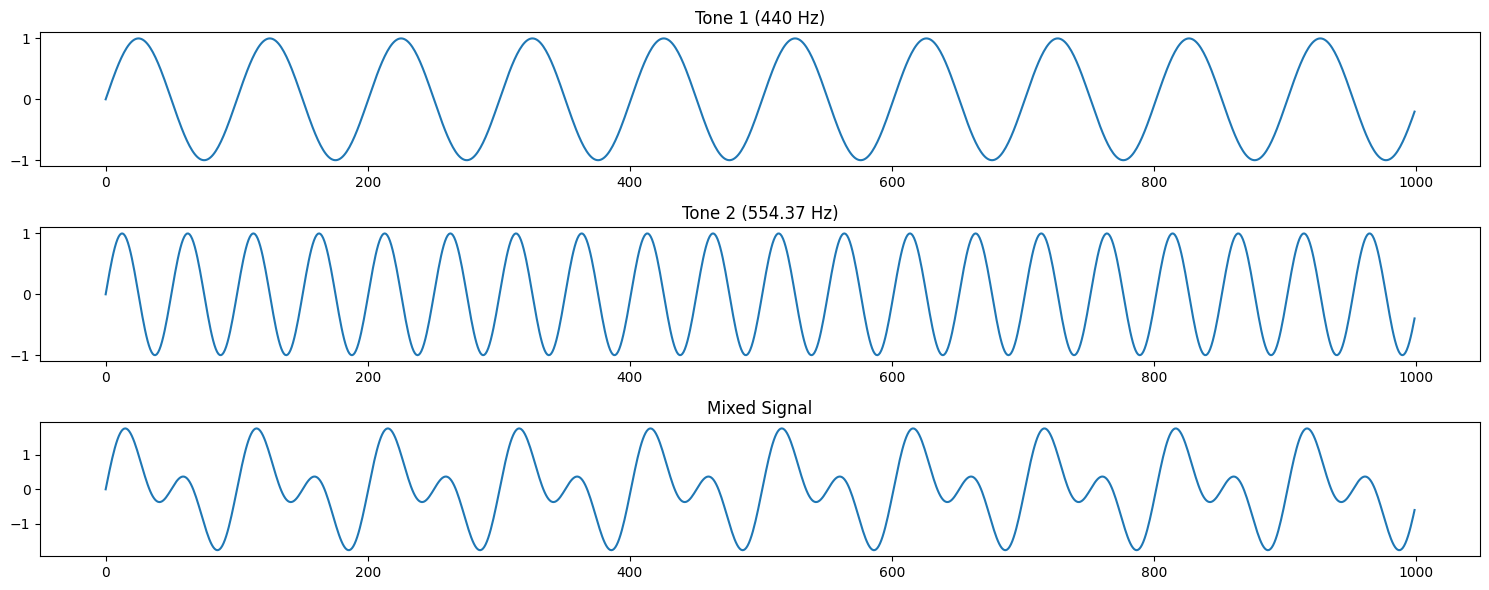

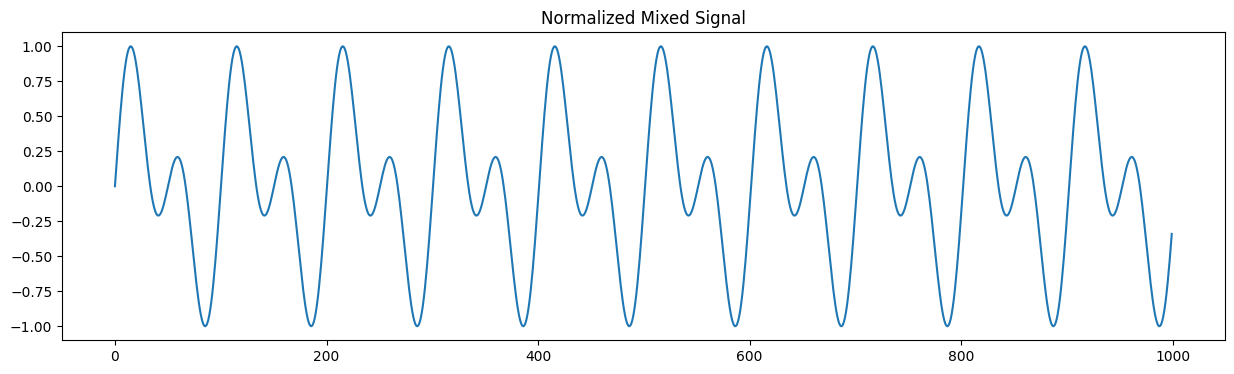

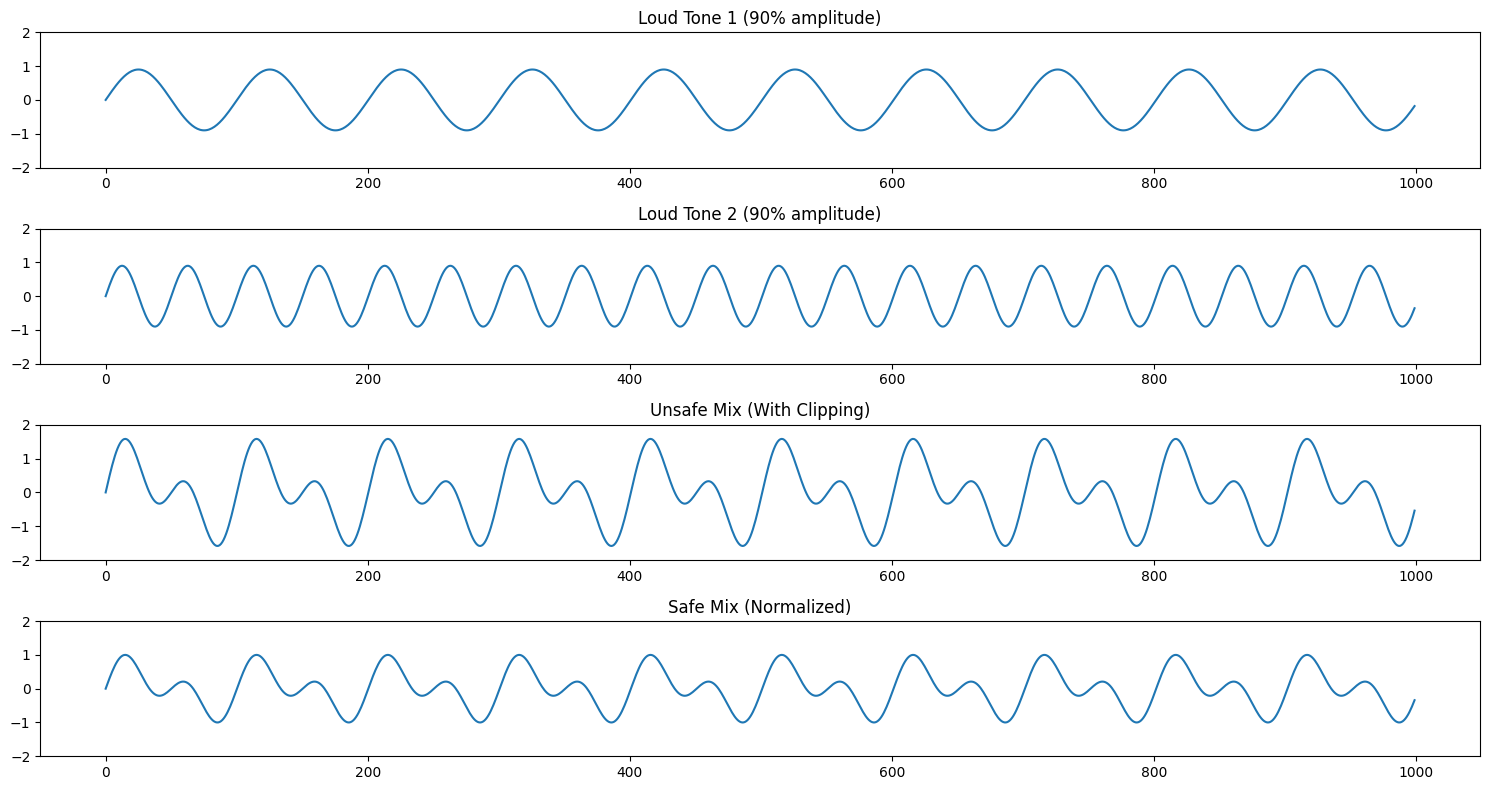

Max amplitude of unsafe mix: {np.max(np.abs(unsafe_mix)):.2f}
Max amplitude of safe mix: {np.max(np.abs(safe_mixed)):.2f}


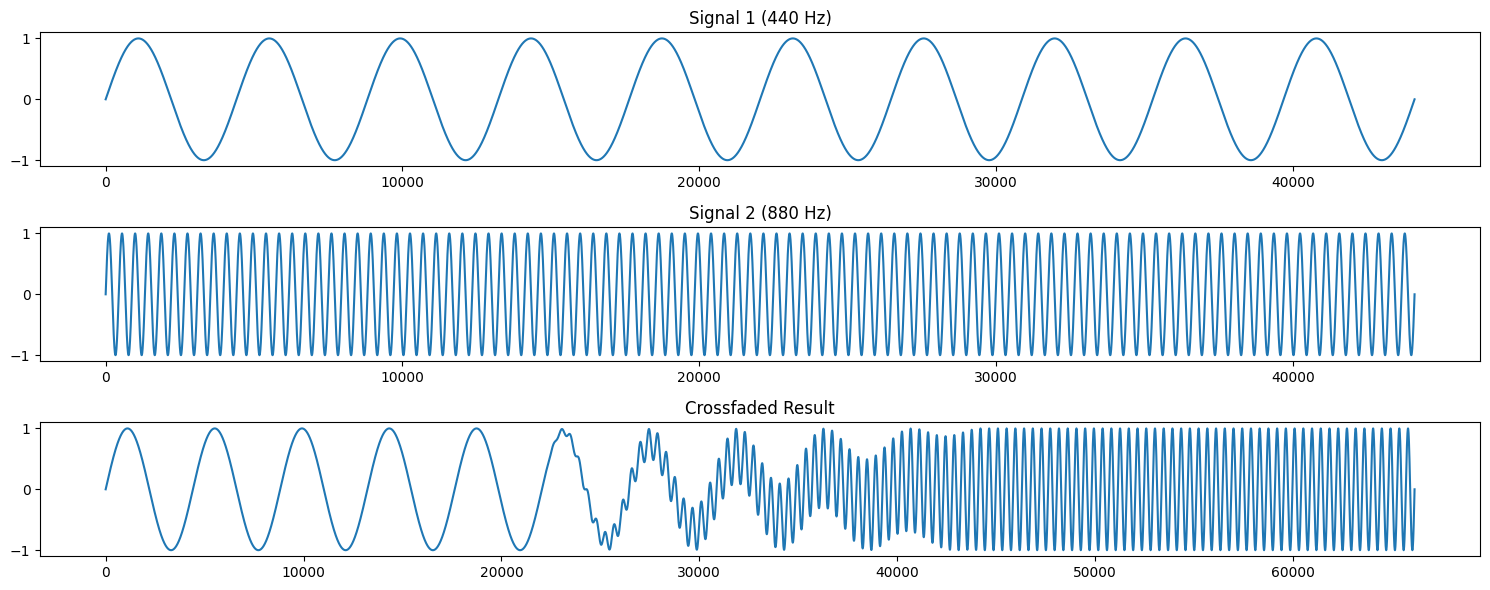

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
import IPython.display as ipd

# 1. Basic Signal Addition (Linear Mixing)
def generate_sine_wave(freq, duration, sample_rate=44100):
    t = np.linspace(0, duration, int(sample_rate * duration))
    return np.sin(2 * np.pi * freq * t)

# Generate two different tones
tone1 = generate_sine_wave(440, 1)  
tone2 = generate_sine_wave(880, 1)  

# Simple mixing by addition
mixed = tone1 + tone2

plt.figure(figsize=(15, 6))
plt.subplot(3, 1, 1)
plt.plot(tone1[:1000])
plt.title('Tone 1 (440 Hz)')
plt.subplot(3, 1, 2)
plt.plot(tone2[:1000])
plt.title('Tone 2 (554.37 Hz)')
plt.subplot(3, 1, 3)
plt.plot(mixed[:1000])
plt.title('Mixed Signal')
plt.tight_layout()
plt.show()

# 2. Amplitude Scaling (Volume Control)
def mix_with_weights(signal1, signal2, weight1=0.5, weight2=0.5):
    return weight1 * signal1 + weight2 * signal2

# Mix with different weights
balanced_mix = mix_with_weights(tone1, tone2)
emphasis_on_tone1 = mix_with_weights(tone1, tone2, 0.8, 0.2)

# 3. Normalization
def normalize(signal):
    return signal / np.max(np.abs(signal))

# Normalize the mixed signal
normalized_mix = normalize(mixed)

plt.figure(figsize=(15, 4))
plt.plot(normalized_mix[:1000])
plt.title('Normalized Mixed Signal')
plt.show()

# 4. Preventing Clipping
def safe_mix(signal1, signal2):
    mixed = signal1 + signal2
    if np.max(np.abs(mixed)) > 1:
        return normalize(mixed)
    return mixed

# Demonstrate clipping prevention
loud_tone1 = tone1 * 0.7
loud_tone2 = tone2 * 0.7
safe_mixed = safe_mix(loud_tone1, loud_tone2)

# Create deliberately loud signals that would clip
loud_tone1 = tone1 * 0.9  # 90% amplitude
loud_tone2 = tone2 * 0.9  # 90% amplitude

# Create both unsafe and safe mixes for comparison
unsafe_mix = loud_tone1 + loud_tone2
safe_mixed = safe_mix(loud_tone1, loud_tone2)

# Visualize the results
plt.figure(figsize=(15, 8))
plt.subplot(4, 1, 1)
plt.plot(loud_tone1[:1000])
plt.title('Loud Tone 1 (90% amplitude)')
plt.ylim(-2, 2)

plt.subplot(4, 1, 2)
plt.plot(loud_tone2[:1000])
plt.title('Loud Tone 2 (90% amplitude)')
plt.ylim(-2, 2)

plt.subplot(4, 1, 3)
plt.plot(unsafe_mix[:1000])
plt.title('Unsafe Mix (With Clipping)')
plt.ylim(-2, 2)

plt.subplot(4, 1, 4)
plt.plot(safe_mixed[:1000])
plt.title('Safe Mix (Normalized)')
plt.ylim(-2, 2)

plt.tight_layout()
plt.show()

# 5. Cross-fading
def crossfade(signal1, signal2, fade_duration=0.1, sample_rate=44100):
    """
    Crossfade between two signals with a specified fade duration
    """
    # Calculate fade length in samples
    fade_length = int(fade_duration * sample_rate)
    
    # Create fade in/out curves for the overlap region
    fade_in = np.linspace(0, 1, fade_length)
    fade_out = np.linspace(1, 0, fade_length)
    
    # Get the full length of both signals
    len1 = len(signal1)
    len2 = len(signal2)
    
    # Create the output signal
    # Total length is sum of both signals minus the overlap
    total_length = len1 + len2 - fade_length
    result = np.zeros(total_length)
    
    # Copy first signal excluding the fade region
    result[:len1-fade_length] = signal1[:len1-fade_length]
    
    # Apply crossfade in the overlap region
    overlap_start = len1 - fade_length
    result[overlap_start:overlap_start+fade_length] = (
        signal1[len1-fade_length:] * fade_out +
        signal2[:fade_length] * fade_in
    )
    
    # Copy remainder of second signal
    result[overlap_start+fade_length:] = signal2[fade_length:]
    
    return result

# Create a crossfade between two tones
tone1 = generate_sine_wave(10, 1)  
tone2 = generate_sine_wave(100, 1)  
crossfaded = crossfade(tone1, tone2, fade_duration=0.5)

plt.figure(figsize=(15, 6))
plt.subplot(3,1,1)
plt.plot(tone1)
plt.title('Signal 1 (440 Hz)')
plt.subplot(3,1,2)
plt.plot(tone2)
plt.title('Signal 2 (880 Hz)')
plt.subplot(3,1,3)
plt.plot(crossfaded)
plt.title('Crossfaded Result')
plt.tight_layout()
plt.show()